In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

%matplotlib inline

In [2]:
df_train = pd.read_csv('data/train.csv')

In [3]:
def heal_cols(data,cols):
    for col in cols:
        data[col].fillna(value=int(data[col].mean()), inplace=True)

In [4]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
dummies = pd.get_dummies(df_train[['Neighborhood', 'MSZoning']])

In [7]:
train_all = pd.concat([df_train, dummies], axis='columns')

In [8]:
y = train_all.SalePrice

In [9]:
X = train_all.select_dtypes(exclude=object).drop(['SalePrice', 'Id'], axis='columns')

In [10]:
heal_cols(X, X.columns)

In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 66 columns):
MSSubClass              1460 non-null int64
LotFrontage             1460 non-null float64
LotArea                 1460 non-null int64
OverallQual             1460 non-null int64
OverallCond             1460 non-null int64
YearBuilt               1460 non-null int64
YearRemodAdd            1460 non-null int64
MasVnrArea              1460 non-null float64
BsmtFinSF1              1460 non-null int64
BsmtFinSF2              1460 non-null int64
BsmtUnfSF               1460 non-null int64
TotalBsmtSF             1460 non-null int64
1stFlrSF                1460 non-null int64
2ndFlrSF                1460 non-null int64
LowQualFinSF            1460 non-null int64
GrLivArea               1460 non-null int64
BsmtFullBath            1460 non-null int64
BsmtHalfBath            1460 non-null int64
FullBath                1460 non-null int64
HalfBath                1460 non-null int64
BedroomAb

In [57]:
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size = 0.33, random_state = 7)

In [58]:
model = XGBRegressor(n_estimators=1000)

In [59]:
eval_set = [(train_X, train_y), (test_X, test_y)]
model.fit(train_X, train_y, eval_set=eval_set, eval_metric=['rmse','mae'], verbose=True, early_stopping_rounds=7)

[0]	validation_0-rmse:176583	validation_0-mae:161552	validation_1-rmse:184289	validation_1-mae:166188
Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.

Will train until validation_1-mae hasn't improved in 7 rounds.
[1]	validation_0-rmse:160044	validation_0-mae:145548	validation_1-rmse:167591	validation_1-mae:149910
[2]	validation_0-rmse:145143	validation_0-mae:131130	validation_1-rmse:152630	validation_1-mae:135292
[3]	validation_0-rmse:131777	validation_0-mae:118151	validation_1-rmse:139171	validation_1-mae:121938
[4]	validation_0-rmse:119777	validation_0-mae:106483	validation_1-rmse:126977	validation_1-mae:109871
[5]	validation_0-rmse:109019	validation_0-mae:96006.1	validation_1-rmse:116171	validation_1-mae:98934
[6]	validation_0-rmse:99370.6	validation_0-mae:86613.7	validation_1-rmse:106731	validation_1-mae:89410.5
[7]	validation_0-rmse:90633.8	validation_0-mae:78142.2	validation_1-rmse:98037.6	validation_1-mae:80782.2
[8]	validation_0-rmse

[77]	validation_0-rmse:15529.1	validation_0-mae:11076.2	validation_1-rmse:34226.5	validation_1-mae:17489.4
[78]	validation_0-rmse:15459.8	validation_0-mae:11048.4	validation_1-rmse:34157.8	validation_1-mae:17483.4
[79]	validation_0-rmse:15412.2	validation_0-mae:11021.7	validation_1-rmse:34137.3	validation_1-mae:17479
[80]	validation_0-rmse:15334.1	validation_0-mae:10976	validation_1-rmse:34113.7	validation_1-mae:17462.1
[81]	validation_0-rmse:15269	validation_0-mae:10934.8	validation_1-rmse:34163.7	validation_1-mae:17491
[82]	validation_0-rmse:15241.2	validation_0-mae:10923.7	validation_1-rmse:34158.8	validation_1-mae:17474
[83]	validation_0-rmse:15202.5	validation_0-mae:10905.9	validation_1-rmse:34109.8	validation_1-mae:17445.6
[84]	validation_0-rmse:15148.7	validation_0-mae:10870.8	validation_1-rmse:34003.7	validation_1-mae:17404.7
[85]	validation_0-rmse:15097.9	validation_0-mae:10831.1	validation_1-rmse:33990.3	validation_1-mae:17374.6
[86]	validation_0-rmse:15034.3	validation_0-mae

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [60]:
prediction = model.predict(test_X)
predictions = [round(value) for value in prediction]

In [61]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(test_y, predictions)

In [62]:
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 0.00%


In [63]:
results = model.evals_result()
epochs = len(results['validation_0']['rmse'])
x_axis = range(0,epochs)

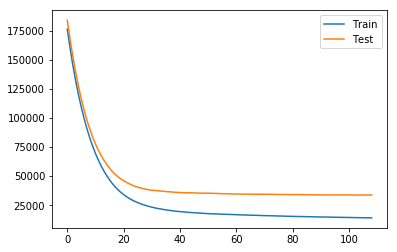

<Figure size 1080x1080 with 0 Axes>

In [64]:
fig, ax = plt.subplots()
ax.plot(x_axis,results['validation_0']['rmse'],label='Train')
ax.plot(x_axis,results['validation_1']['rmse'], label='Test')
ax.legend()
plt.xlabel= "Epochs"
plt.ylabel= "Root mean squared error"
plt.title= 'test'
plt.figure(figsize=(15,15))
plt.show()



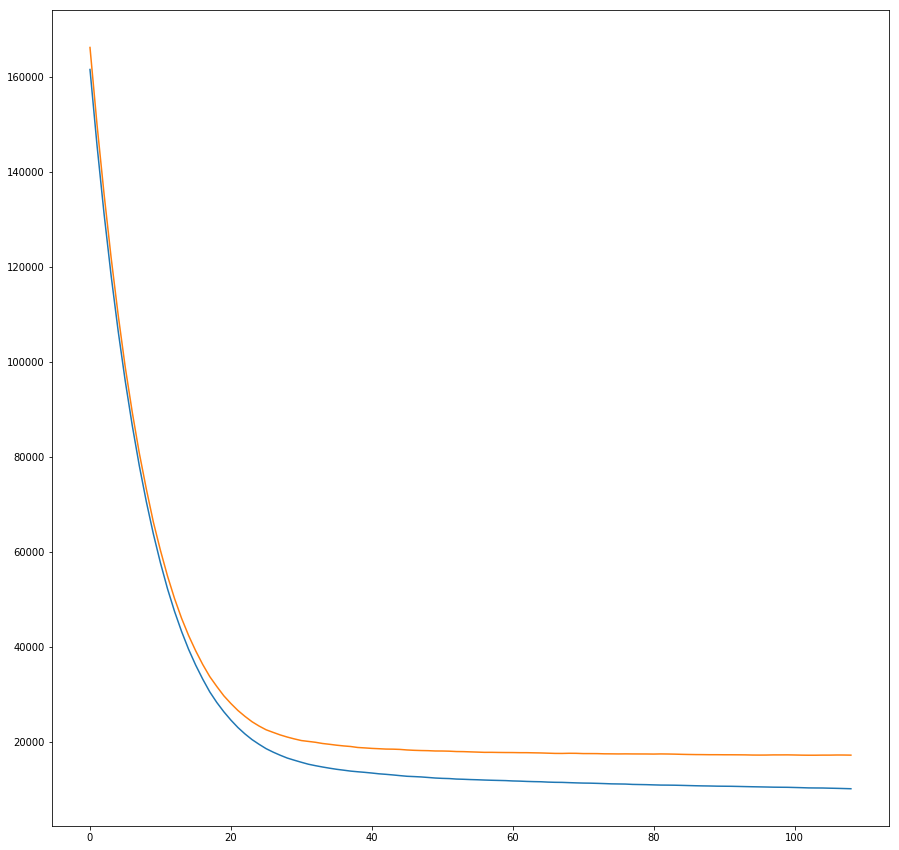

In [65]:
plt.figure(figsize=(15,15))
plt.xlabel='test'
plt.plot(x_axis,results['validation_0']['mae'])
plt.plot(x_axis,results['validation_1']['mae'])